# Matplotlib


Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+.

Why to use Matplotlib?

Generally easy to get started for simple plots

*   Support for custom labels and texts
*   Great control of every element in a figure
*   High-quality output in many formats
*   Very customizable in general












In [ ]:
#Loading the Dataset
import pandas as pd
df = pd.read_csv('wine.csv')

In [ ]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
df.shape

(7835, 14)

In [ ]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                   float64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

# Understanding the type of Visualization needs during EDA

# 1.Univariate Analysis


Univariate analysis in visualization refers to the exploration and representation of a single variable using visual methods. It involves creating visualizations that focus on understanding the distribution, patterns, and characteristics of a single variable without considering its relationship with other variables.

In univariate visualization, Our main goal is to gain insights into the individual variable's properties and explore its behavior. Some common types of univariate visualizations include:

## Bar Chart

Good for nominal and small ordinal categorical data.

In [ ]:
df['province'].describe()

count         129908
unique           425
top       California
freq           36247
Name: province, dtype: object

<Axes: >

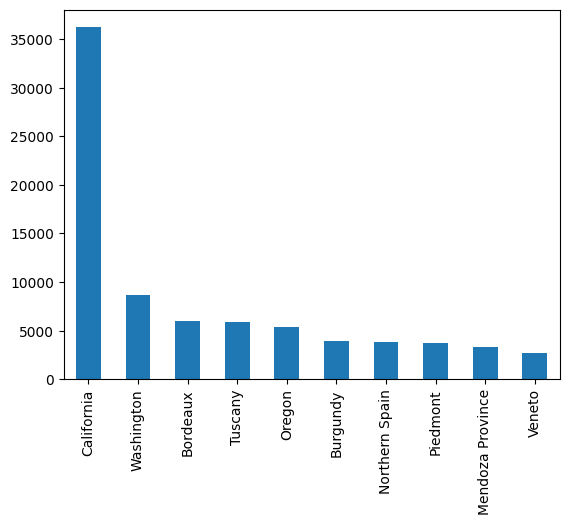

In [ ]:
#pandas plot method
df['province'].value_counts().head(10).plot.bar()

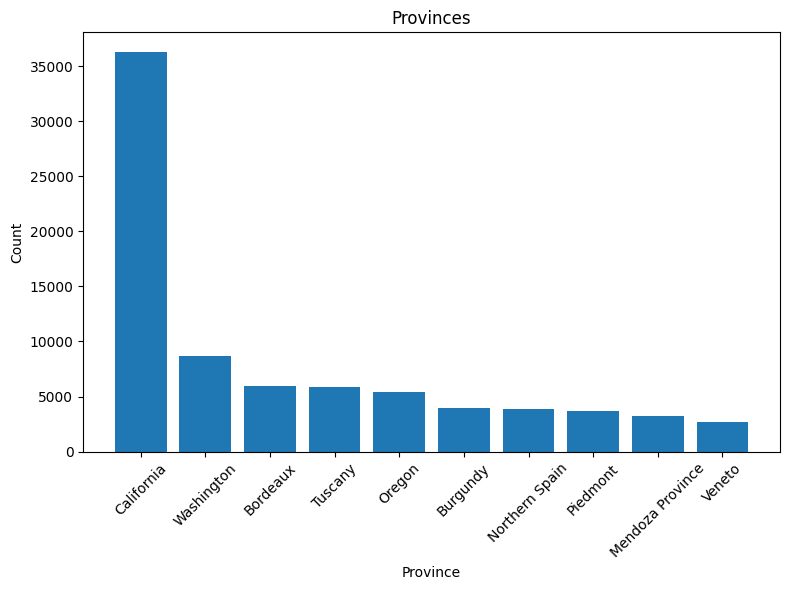

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
provinces = df['province'].value_counts().head(10)
plt.bar(provinces.index, provinces.values)
plt.xlabel('Province')
plt.ylabel('Count')
plt.title('Provinces')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Line Chart

Good for ordinal categorical and interval data.

<Axes: >

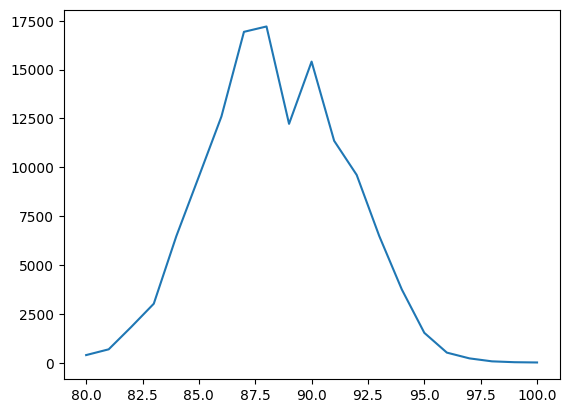

In [ ]:
df['points'].value_counts().sort_index().plot.line()

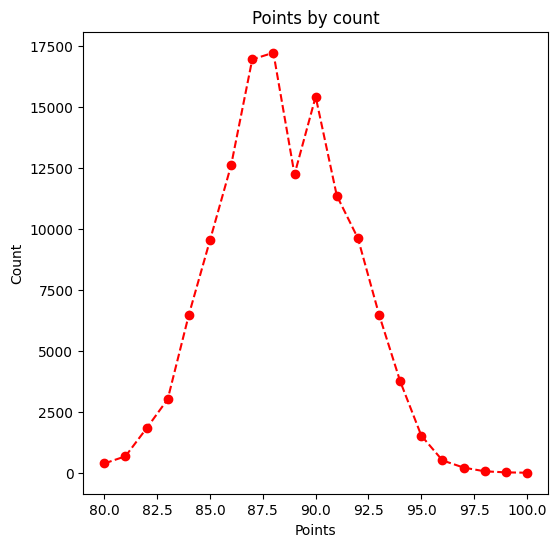

In [ ]:
plt.figure(figsize=(6, 6))
points = df['points'].value_counts().sort_index()
plt.plot(points.index, points.values,'ro--')
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Points by count')
plt.show()

## Area Charts

Good for ordinal categorical and interval data.

<Axes: >

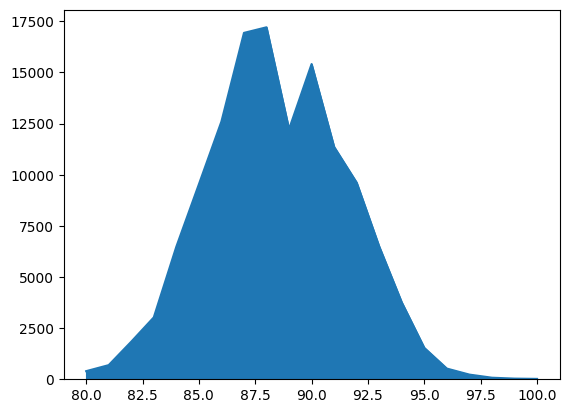

In [ ]:
df['points'].value_counts().sort_index().plot.area()

In [ ]:
# df['points'].value_counts().sort_index().plot.area()

# plt.xlabel('Points')
# plt.ylabel('Frequency')
# plt.title('Distribution of Points')

# plt.show()

### Histogram

In [ ]:
# df[df['price'] < 200]['price'].plot.hist()

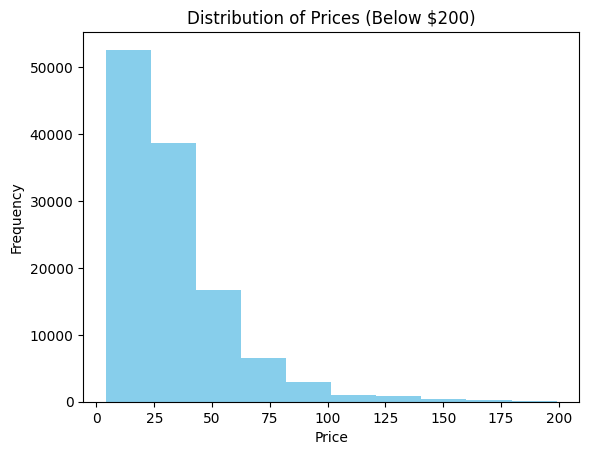

In [ ]:
plt.hist(df[df['price'] < 200]['price'],color = "skyblue")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (Below $200)')
plt.show()

<Axes: ylabel='Frequency'>

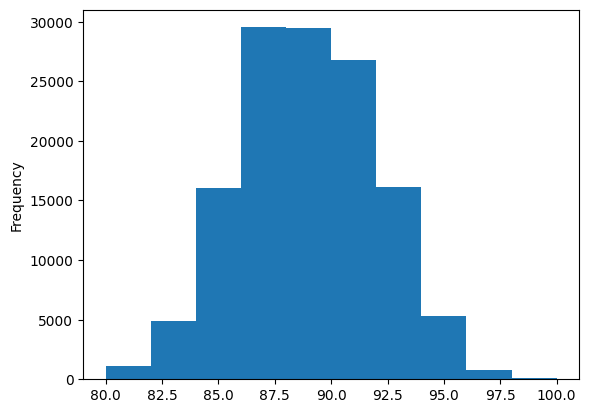

In [ ]:
df['points'].plot.hist()

In [ ]:
# plt.hist(df['points'],color = "skyblue")
# plt.xlabel('Points')
# plt.ylabel('Frequency')
# plt.title('Distribution of Points')

# plt.show()

## Pie Chart
Pie charts are like bar charts, but wrapped around a circle. You should just use a bar chart instead.


pie charts work well for quantities that are near common fractional values: one-half, one-third, and one-quarter. However, once you start to drill down into tenths, and twelvths, and so on, our ability to visually compare two pie slices, especially ones not immediately adjacent to one another, breaks down.

<Axes: ylabel='province'>

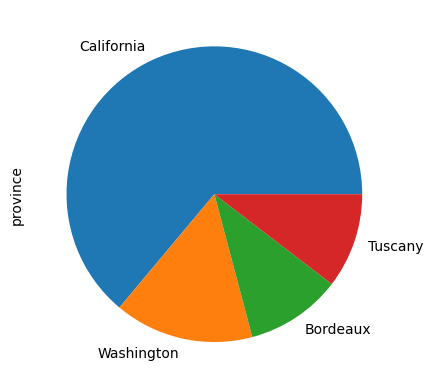

In [ ]:
df['province'].value_counts().head(4).plot.pie()

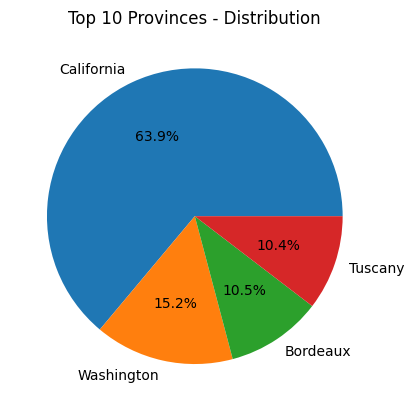

In [ ]:
province_counts = df['province'].value_counts().head(4)
plt.pie(province_counts, labels=province_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Provinces - Distribution')
plt.axis('equal')
plt.show()

# 2.Bivariate Analysis

Previously, we explored using pandas and matplotlib to plot and understand relationships within a single column. In this notebook, we'll expand this view by looking at plots that consider two variables at a time.






We need to understand how variables interact with one another. Does an increase in one variable correlate with an increase in another? Does it relate to a decrease somewhere else? The best way to paint the picture in is by using plots that enable these possibilities.

## Scatter Plot

Using pandas plot function

In [ ]:
# df[df['price'] < 100].sample(100).plot.scatter(x='price', y='points')

Using Matplotlib

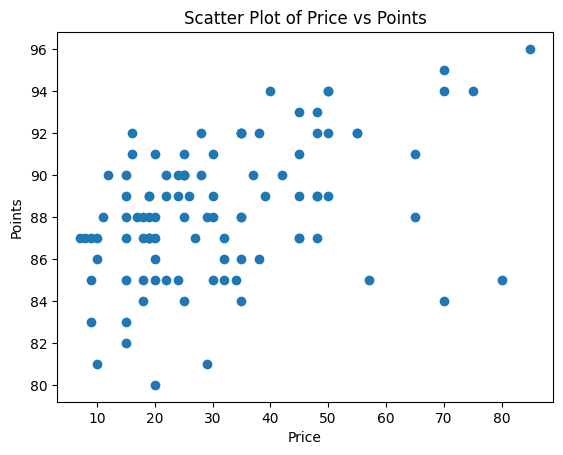

In [ ]:
subset = df[df['price'] < 100].sample(100)
plt.scatter(x=subset['price'], y=subset['points'])
plt.xlabel('Price')
plt.ylabel('Points')
plt.title('Scatter Plot of Price vs Points')
plt.show()

## Hexplot
The hex plot is particularly useful when visualizing a large number of data points, as it provides a more compact representation compared to individual points. The use of hexagons allows for a structured and uniform representation of the data distribution.

<Axes: xlabel='price', ylabel='points'>

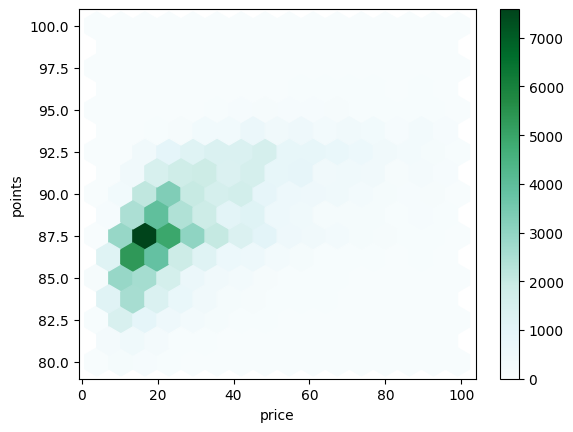

In [ ]:
df[df['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

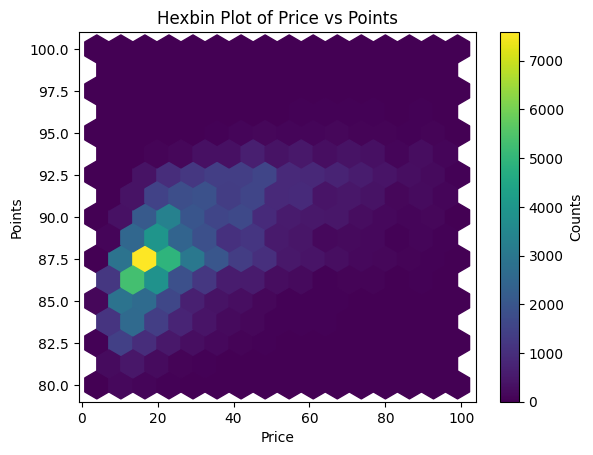

In [ ]:
subset = df[df['price'] < 100]
plt.hexbin(x=subset['price'], y=subset['points'], gridsize=15)
plt.xlabel('Price')
plt.ylabel('Points')
plt.title('Hexbin Plot of Price vs Points')
plt.colorbar(label='Counts')
plt.show()

## Pair Plot

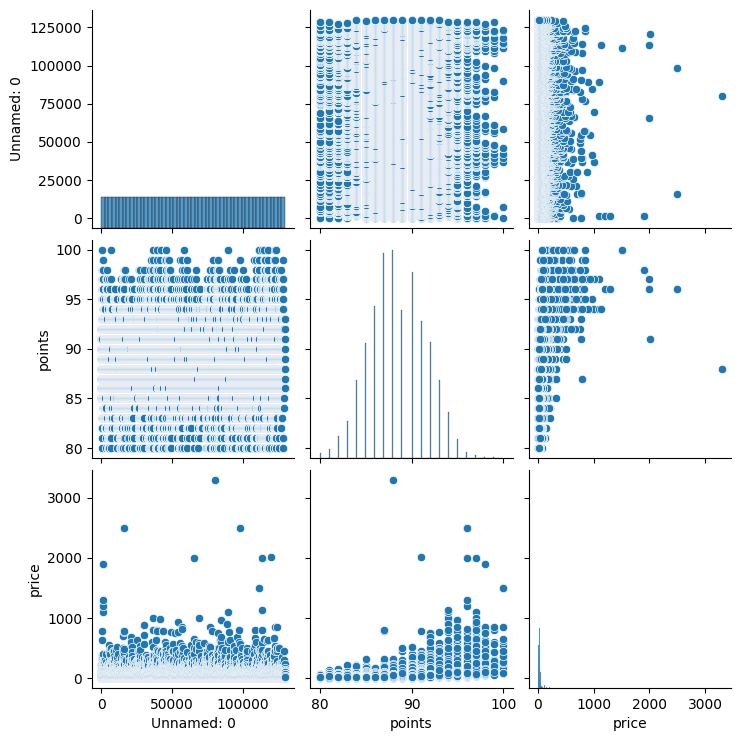

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 10))
# scatter_matrix = pd.plotting.scatter_matrix(df, ax=ax)
# # plt.tight_layout()
# plt.show()

<Axes: >

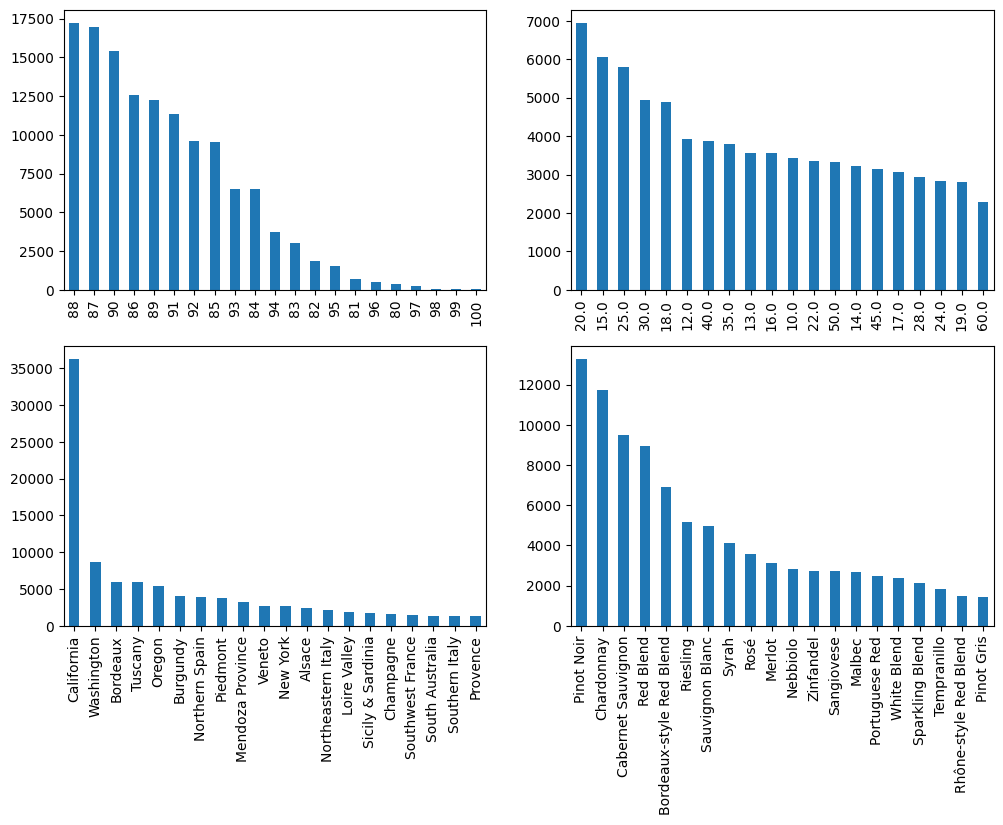

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

df['points'].value_counts().plot.bar(
    ax=axarr[0][0]
)
df['price'].value_counts().head(20).plot.bar(
    ax=axarr[0][1]
)

df['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][0]
)
df['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
)